In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy import stats
import matplotlib.patches as mpatches


sys.path.append('../../..')

In [2]:
sns.set_theme(style='white', palette='pastel')


In [3]:
from scripts import project_functions as pf
path = "/Users/nitchakan/Desktop/DATA301/project-group45-project/data/raw/GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.csv"

df = pf.load_and_process(path)
df

,taxonomy,A1,A10,A100,A101,A102,A104,A105,A106,A108,...,TD_ASDdiff,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,Positive
39,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,7,5,38,91,26,23,124,219,30,...,185,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Ruminococcus_2,_s__uncultured_bacterium_g__Ruminococcus_2,1
47,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,0,0,0,0,1,0,0,0,0,...,43,d__Bacteria,_k__norank,_p__Bacteroidetes,_c__Bacteroidia,_o__Bacteroidales,_f__Prevotellaceae,_g__Alloprevotella,_s__uncultured_organism_g__Alloprevotella,1
49,d__Bacteria;_k__norank;_p__Firmicutes;_c__Nega...,127,2936,228,240,36,224,290,179,282,...,-554,d__Bacteria,_k__norank,_p__Firmicutes,_c__Negativicutes,_o__Selenomonadales,_f__Veillonellaceae,_g__Dialister,_s__unclassified_g__Dialister,0
65,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,347,197,314,98,895,180,1753,192,440,...,248,d__Bacteria,_k__norank,_p__Bacteroidetes,_c__Bacteroidia,_o__Bacteroidales,_f__Bacteroidaceae,_g__Bacteroides,_s__Bacteroides_stercoris_ATCC_43183,1
72,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,302,268,373,369,73,207,523,128,365,...,-144,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Lachnospiraceae,_g__Lachnospiraceae_NK4A136_group,_s__uncultured_organism_g__Lachnospiraceae_NK4...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,d__Bacteria;_k__norank;_p__Proteobacteria;_c__...,150,464,218,755,123,167,455,172,1059,...,-89,d__Bacteria,_k__norank,_p__Proteobacteria,_c__Betaproteobacteria,_o__Burkholderiales,_f__Alcaligenaceae,_g__Parasutterella,_s__uncultured_organism_g__Parasutterella,0
1264,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,0,0,0,0,0,0,0,0,0,...,-25,d__Bacteria,_k__norank,_p__Bacteroidetes,_c__Bacteroidia,_o__Bacteroidales,_f__Prevotellaceae,_g__Prevotella_7,_s__uncultured_organism_g__Prevotella_7,0
1265,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,0,0,0,...,-28,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__[Eubacterium]_coprostanoligenes_group,_s__gut_metagenome_g__[Eubacterium]_coprostano...,0
1294,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,137,176,238,242,178,94,208,54,223,...,28,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Ruminococcus_2,_s__unclassified_g__Ruminococcus_2,1


In [4]:
# profile=ProfileReport(df)
# ProfileReport(df).to_notebook_iframe()

In [5]:
df['Domain'] = df['Domain'].str.split("__").str[-1]
df['Kingdom'] = df['Kingdom'].str.split("__").str[-1]
df['Phylum'] = df['Phylum'].str.split("__").str[-1]
df['Class'] = df['Class'].str.split("__").str[-1]
df['Order'] = df['Order'].str.split("__").str[-1]
df['Family'] = df['Family'].str.split("__").str[-1]
df['Genus'] = df['Genus'].str.split("__").str[-1]
df['Species'] = df['Species'].str.split("s__").str[-1]

df

,taxonomy,A1,A10,A100,A101,A102,A104,A105,A106,A108,...,TD_ASDdiff,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,Positive
39,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,7,5,38,91,26,23,124,219,30,...,185,Bacteria,norank,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcus_2,uncultured_bacterium_g__Ruminococcus_2,1
47,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,0,0,0,0,1,0,0,0,0,...,43,Bacteria,norank,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Alloprevotella,uncultured_organism_g__Alloprevotella,1
49,d__Bacteria;_k__norank;_p__Firmicutes;_c__Nega...,127,2936,228,240,36,224,290,179,282,...,-554,Bacteria,norank,Firmicutes,Negativicutes,Selenomonadales,Veillonellaceae,Dialister,unclassified_g__Dialister,0
65,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,347,197,314,98,895,180,1753,192,440,...,248,Bacteria,norank,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides_stercoris_ATCC_43183,1
72,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,302,268,373,369,73,207,523,128,365,...,-144,Bacteria,norank,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Lachnospiraceae_NK4A136_group,uncultured_organism_g__Lachnospiraceae_NK4A136...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,d__Bacteria;_k__norank;_p__Proteobacteria;_c__...,150,464,218,755,123,167,455,172,1059,...,-89,Bacteria,norank,Proteobacteria,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Parasutterella,uncultured_organism_g__Parasutterella,0
1264,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,0,0,0,0,0,0,0,0,0,...,-25,Bacteria,norank,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella_7,uncultured_organism_g__Prevotella_7,0
1265,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,0,0,0,...,-28,Bacteria,norank,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,[Eubacterium]_coprostanoligenes_group,gut_metagenome_g__[Eubacterium]_coprostanolige...,0
1294,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,137,176,238,242,178,94,208,54,223,...,28,Bacteria,norank,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcus_2,unclassified_g__Ruminococcus_2,1


In [6]:
df.describe()

,A1,A10,A100,A101,A102,A104,A105,A106,A108,A109,...,B58,B59,B6,B60,B61,AllAvg,TDmean,ASDmean,TD_ASDdiff,Positive
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000
mean,351.173333,330.480000,306.893333,319.600000,310.613333,301.720000,328.040000,235.493333,327.96000,336.213333,...,343.666667,357.253333,327.973333,339.386667,346.400000,324.557619,326.048392,322.967447,2.96000,0.386667
std,971.040976,727.417672,492.974907,758.259404,737.945063,758.233964,587.284853,482.935824,919.47831,682.177759,...,812.494280,1280.194824,715.150163,680.240039,885.916444,470.369882,501.994274,450.570461,193.13113,0.490266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,11.440476,0.111888,0.135135,-554.00000,0.000000
25%,19.500000,11.500000,37.000000,19.500000,18.000000,22.000000,19.000000,24.500000,24.00000,7.500000,...,8.000000,3.000000,19.500000,3.500000,7.500000,49.650794,49.723776,50.815315,-64.50000,0.000000
50%,65.000000,101.000000,149.000000,105.000000,92.000000,83.000000,102.000000,84.000000,97.00000,67.000000,...,74.000000,30.000000,79.000000,33.000000,61.000000,168.738095,149.181818,192.027027,-26.00000,0.000000
75%,270.500000,258.500000,293.500000,275.500000,249.500000,223.000000,333.000000,245.000000,280.00000,281.500000,...,215.500000,107.500000,278.000000,340.500000,245.500000,359.888889,361.902098,391.738739,33.50000,1.000000
max,5865.000000,4808.000000,2616.000000,5839.000000,5701.000000,5758.000000,3064.000000,3336.000000,7544.00000,3742.000000,...,5148.000000,8602.000000,4702.000000,3696.000000,6184.000000,2864.325397,2886.741259,2833.423423,1261.00000,1.000000


## Task 3 - EDA


#### To visualize the bacteria abundance in each level of the taxonomy... we first need to find the best graph that could help others better observe my findings


**This is graph test visualizations part.**

Note:
- Hexbin plot won't work because the taxonomy is not a number but a string
- Pairplot won't be a good idea since most the axes would be the name of bacteria.

In [7]:
# at phylum level

dfP = (df.groupby('Phylum')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfP

,TD_ASDdiff
Phylum,
Bacteroidetes,71.296296
Firmicutes,-24.459459
Tenericutes,-33.000000
Proteobacteria,-52.000000
Fusobacteria,-62.000000
Verrucomicrobia,-73.000000
Actinobacteria,-159.000000


The table above shows count of the phylum of bacteria abundance in each group. 
I think this graph could work. It's very nice to look at and see the difference in bacteriai abundance in both groups for each phylum.

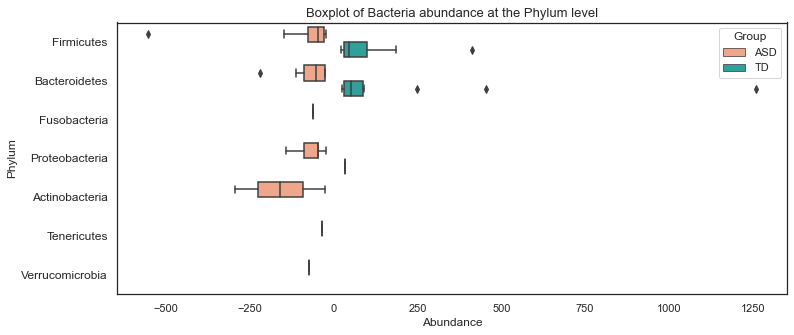

In [42]:
fig, ax = plt.subplots(figsize = (12, 5))


p2 = sns.boxplot(data=df, x='TD_ASDdiff', y='Phylum', hue='Positive',palette = ['lightsalmon', 'lightseagreen'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["ASD", "TD"], loc="best", title="Group")
ax.set_title('Boxplot of Bacteria abundance at the Phylum level', fontsize=13)
ax.set_xlabel('Abundance')
ax.set_ylabel('Phylum')
ax.yaxis.set_tick_params(labelsize='medium')

plt.show()

The boxplot above shows the bacteria abundance at the Phylum level in TD and ASD group.

I don't think I like my data to be visualize this way. I think is a bit confusing when looking at it like this. I rather prefer the upper bargraph to comparing how much bacteria abundnace is present in each group and at the phylum level to this boxplot here.

In [9]:
#ummm how do you scale this graph?

# sns.pairplot(data=df,corner=True,
#             x_vars=["Phylum","Class", "Order", "TD_ASDdiff"], 
#             y_vars=["Phylum","Class", "Order", "TD_ASDdiff"], 
#             )
# plt.show()

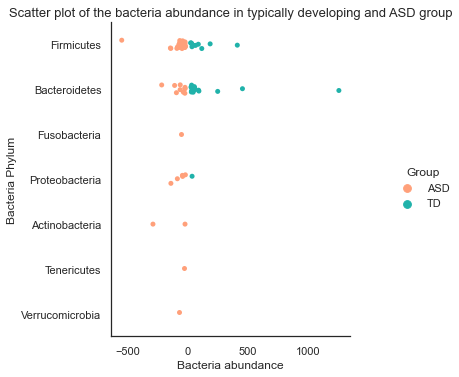

In [50]:
#I see the outliers here

p3 = sns.catplot(y="Phylum", x="TD_ASDdiff", data=df, hue = "Positive", legend=True, palette = ['lightsalmon', 'lightseagreen'])
p3._legend.set_title("Group")
new_labels=['ASD', 'TD']
for t, l in zip(p3._legend.texts, new_labels): t.set_text(l)
ax.yaxis.set_tick_params(labelsize='large')
plt.title('Scatter plot of the bacteria abundance in typically developing and ASD group', fontsize=13)
plt.ylabel('Bacteria Phylum')
plt.xlabel('Bacteria abundance')


plt.show()

A scatterplot above shows the relationship between the data point of bacteria abundance at the phylum level in Typically Developing (TD) group and ASD group.
I don't think this is the best graph to represent my data and the result of the calculations that I have done to obtained the values. And it doesn't bring out the important information that I would like it to be in my graph.

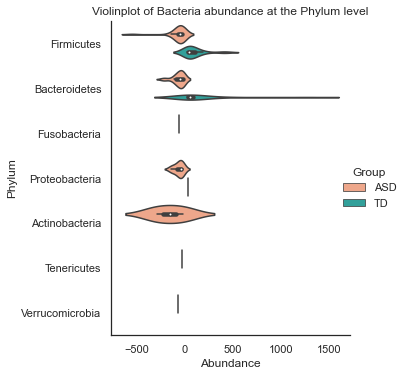

In [44]:
p4 = sns.catplot(x="TD_ASDdiff", y="Phylum", kind="violin", data=df, hue = 'Positive', legend=True, 
                 palette = ['lightsalmon', 'lightseagreen']
                 ).set(title='Violinplot of Bacteria abundance at the Phylum level',
                      xlabel= 'Abundance', 
                      ylabel='Phylum')
p4._legend.set_title("Group")
new_labels=['ASD', 'TD']
for t, l in zip(p4._legend.texts, new_labels): t.set_text(l)
ax.yaxis.set_tick_params(labelsize='large')

plt.show()

The violoin plot above shows the bacteria abundance at the phylum level in typically developing group and ASD group at the phylum level. The violin in green represent the TD group and in red represent the ASD group. This graph might not be the best to show the difference of abundance in both groups since it's a bit hard to interpret at the first look and there were no violin present in some phylum. 

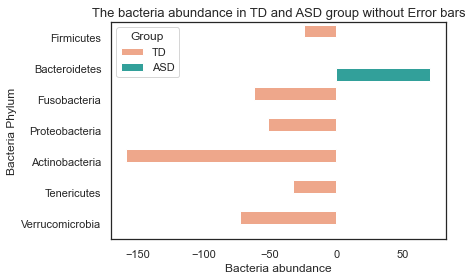

In [45]:

sns.barplot(x='TD_ASDdiff', y='Phylum', data =df, ci=None, 
            hue=["b" if y not in ['Bacteroidetes', 'Synergistetes'] else "r" for y in df.Phylum], 
            palette = ['lightsalmon', 'lightseagreen'])

plt.title('The bacteria abundance in TD and ASD group without Error bars', fontsize=13)
plt.ylabel('Bacteria Phylum')
plt.xlabel('Bacteria abundance')
plt.legend(title="Group", labels=["TD", "ASD"])
ax.yaxis.set_tick_params(labelsize='large')

plt.show()

The graph above shows the difference in the bacteria abundance in the gut microbiome in Typically Developing (TD) group and ASD group at the phylum level. I could't get the legend to work properly but the green bar shows that the phylum Bacteroidetes was more abundace in TD group while the rest of the bacteria phylum were more abundant in ASD group.

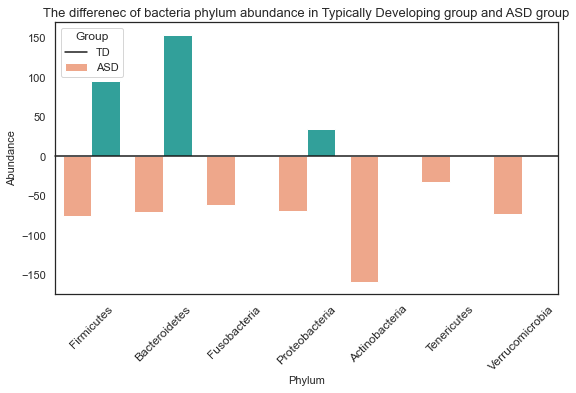

In [13]:
fig, ax = plt.subplots(figsize = (9, 5))

sns.barplot(y='TD_ASDdiff', x='Phylum', data=df, ci=None, hue="Positive", palette = ['lightsalmon', 'lightseagreen'])
ax.axhline(0, color="k", clip_on=False)
plt.title('The differenec of bacteria phylum abundance in Typically Developing group and ASD group', fontsize=13)
plt.legend(title="Group", labels=["TD", "ASD"])
plt.xlabel('Phylum', fontsize=11)
plt.ylabel('Abundance', fontsize=11)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, fontsize='medium')
plt.show()

The graph above should should something similar to the previous graph above but it's not working. If the graph was working, we would see that only phylum Bacteroidetes would be more abundant in typically developing (TD) group and the rest of the phylum would be more abundance in ASD group. 

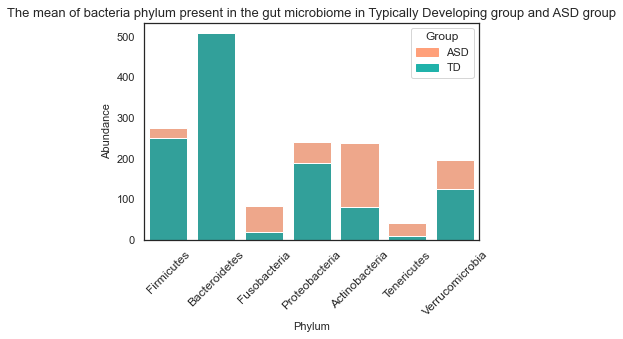

In [14]:
b1 = sns.barplot(x='Phylum', y='ASDmean', data=df, ci=None, color='lightsalmon')
b2= sns.barplot(x='Phylum', y='TDmean', data=df, ci=None, color='lightseagreen')

locs, labels = plt.xticks()
plt.setp(labels, rotation=45, fontsize='medium')
plt.title('The mean of bacteria phylum present in the gut microbiome in Typically Developing group and ASD group', fontsize=13)
plt.xlabel('Phylum', fontsize=11)
plt.ylabel('Abundance', fontsize=11)
top_bar = mpatches.Patch(color="lightsalmon", label='ASD')
bottom_bar = mpatches.Patch(color='lightseagreen', label='TD')
plt.legend(handles=[top_bar, bottom_bar], title='Group')



plt.show()

## Task 4

### **Reseach Questions**
#### What are the main genus and species of gut microbiome present in ASD individuals and typically developing individuals and what could possibly be the be the driver species responsible for ASD.

### Results
**At Genus level**

#### Table 1. The relationship between the unique genera and the relative bacteria abundance between TD and ASD groups.
The postive values indicate that the genera were more abundant/enrichment in the TD group, and negative values indicate that the genera were more abundant/enrichment in ASD group.

In [41]:
#at genus level

dfG = (df.groupby('Genus')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfG.tail()

,TD_ASDdiff
Genus,
Roseburia,-93.0
Lachnospiraceae_NK4A136_group,-104.0
Escherichia-Shigella,-143.0
Dialister,-293.0
Bifidobacterium,-293.0


#### Table 2. The basic statistical details of the difference in bacteria abundance between TD and ASD groups.

In [23]:
dfG.describe().T

,count,mean,std,min,25%,50%,75%,max
TD_ASDdiff,48.0,2.49256,210.028155,-293.0,-63.75,-26.0,28.25,1261.0


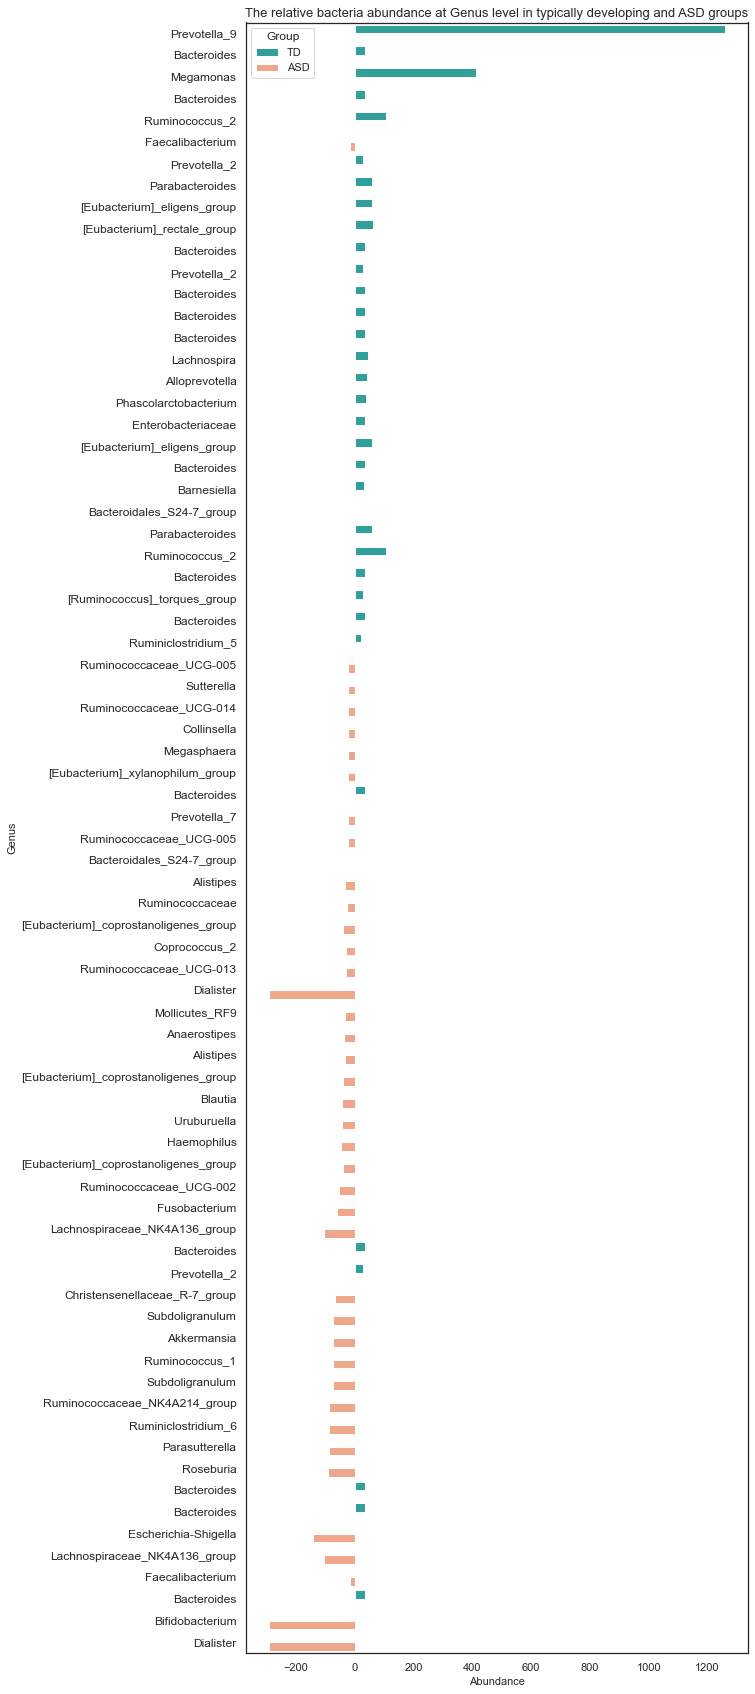

In [46]:
#bacteria abundance at Genus level
fig, ax = plt.subplots(figsize = (9, 30))

PF = sns.barplot(y='Genus', x='TD_ASDdiff', data=df, ci=None,
                 hue=["b" if y not in ['Prevotella_9', 'Megamonas', 'Ruminococcus_2', '[Eubacterium]_rectale_group',
                                      '[Eubacterium]_eligens_group', 'Parabacteroides', 'Lachnospira', 'Alloprevotella',
                                       'Phascolarctobacterium', 'Bacteroides', 'Enterobacteriaceae', 'Barnesiella', 
                                       '[Ruminococcus]_torques_group', 'Prevotella_2', 'Ruminiclostridium_5', 'Bacteroidales_S24-7_group'
                                      ] else "r" for y in df.Genus], 
                 order=df.sort_values('TD_ASDdiff', ascending = False).Genus,
                 palette = ['lightseagreen', 'lightsalmon'])

# pF = sns.countplot(y='Genus', data=df, hue='Positive',)
plt.title('The relative bacteria abundance at Genus level in typically developing and ASD groups', fontsize=13)
plt.ylabel('Genus', fontsize=11)
plt.xlabel('Abundance', fontsize=11)
plt.legend(title="Group", labels=["TD", "ASD"], loc='upper left')
ax.yaxis.set_tick_params(labelsize='medium')
plt.show()

#### Figure 1. The relative bacteria abundance of both TD and ASD groups at the genus level.
The green bars indicate that the genera were enrichment in TD group, and re bars indicate that the genera were enrichent in ASD group.

At the genus level, genera Bifidobacterium at 293 abundace, Dialister at 293 abundace, and Escherichia-Shigell at 143 abundance, were more abundant in ASD group, while Prevotella 9 at 1261 abundance, Megamonas at 412 abundance and Rumicoccus 2 at 106.5 abundance, were more abundant in TD group. 

*Note: some genera were shown more than once because there are multiple species present in the genus. 

**At Species level**

#### Table 3. The bacteria species (and genus) and its relative bacteria abundance in TD and ASD groups.
The postive values indicate that the species were more abundant/enrichment in the TD group, and negative values indicate that the species were more abundant/enrichment in ASD group.

In [40]:
#at species level

dfS = (df.groupby('Species')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfS.tail()

,TD_ASDdiff
Species,
uncultured_organism_g__Lachnospiraceae_NK4A136_group,-144.0
uncultured_organism_g__Faecalibacterium,-147.0
Bacteroides_uniformis,-220.0
Bifidobacterium_pseudocatenulatum_DSM_20438__JCM_1200__LMG_10505,-293.0
unclassified_g__Dialister,-554.0


#### Table 4. The basic statistical details of the relative bacteria abundace in TD and ASD groups.

In [20]:
dfS.describe().T

,count,mean,std,min,25%,50%,75%,max
TD_ASDdiff,67.0,-0.373134,197.627909,-554.0,-64.5,-26.0,33.0,1261.0


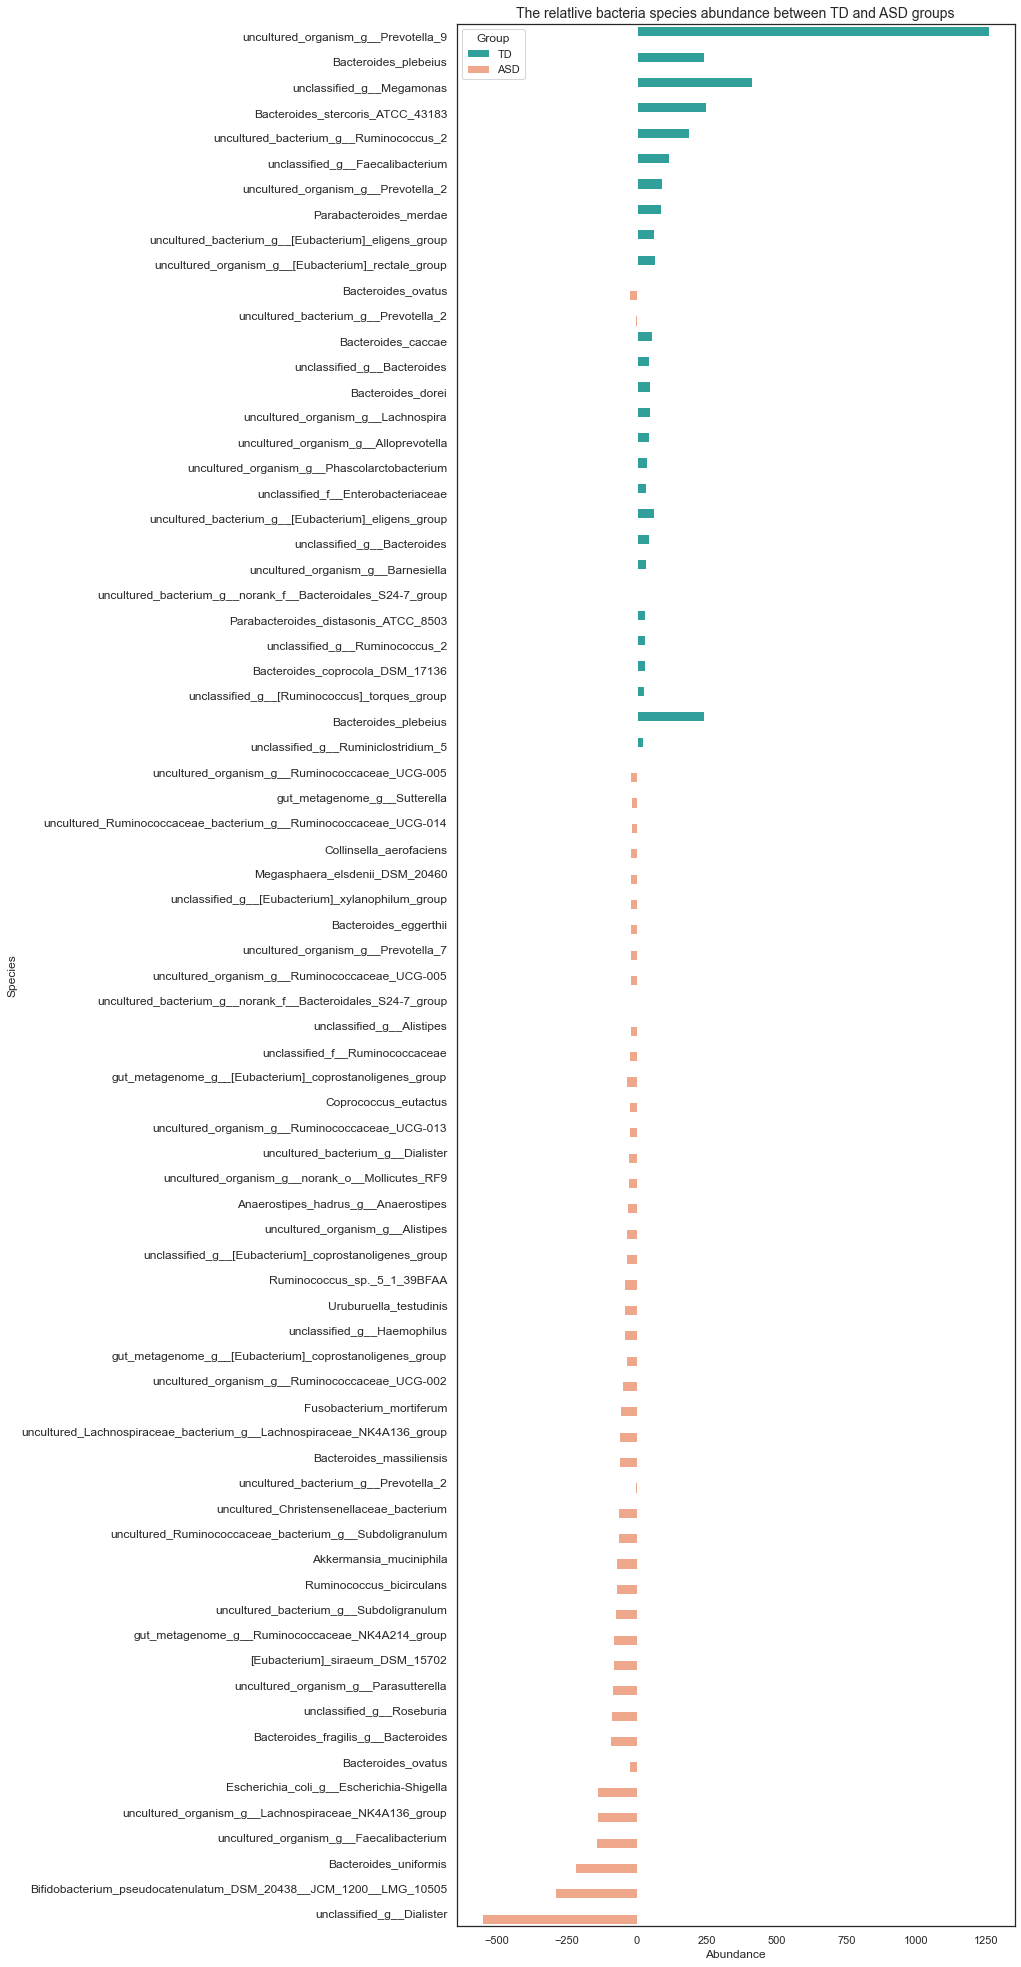

In [49]:
#bacteria abundance at Species level
fig, ax = plt.subplots(figsize = (10,35))

PF = sns.barplot(y='Species', x='TD_ASDdiff', data=df, ci=None,
                 hue=["b" if y not in ['uncultured_organism_g__Prevotella_9', 'unclassified_g__Megamonas', 
                                       'Bacteroides_stercoris_ATCC_43183', 'Bacteroides_plebeius', 'uncultured_bacterium_g__Ruminococcus_2', 
                                       'unclassified_g__Faecalibacterium', 'uncultured_organism_g__Prevotella_2', 'Parabacteroides_merdae', 
                                       'uncultured_organism_g__[Eubacterium]_rectale_group', 'uncultured_bacterium_g__[Eubacterium]_eligens_group', 
                                       'Bacteroides_caccae', 'Bacteroides_dorei', 'uncultured_organism_g__Lachnospira', 'uncultured_organism_g__Alloprevotella', 
                                       'unclassified_g__Bacteroides', 'uncultured_organism_g__Phascolarctobacterium', 'unclassified_f__Enterobacteriaceae', 
                                       'uncultured_organism_g__Barnesiella', 'Parabacteroides_distasonis_ATCC_8503', 'unclassified_g__Ruminococcus_2', 
                                       'Bacteroides_coprocola_DSM_17136', 'unclassified_g__[Ruminococcus]_torques_group', 'unclassified_g__Ruminiclostridium_5', 
                                       'uncultured_bacterium_g__norank_f__Bacteroidales_S24-7_group'] else "r" for y in df.Species],
                order=df.sort_values('TD_ASDdiff', ascending = False).Species, 
                palette = ['lightseagreen', 'lightsalmon'])

# pF = sns.countplot(y='Species', data=df, hue='Positive',)

plt.title('The relatlive bacteria species abundance between TD and ASD groups', fontsize=14)
plt.ylabel('Species', fontsize=12)
plt.xlabel('Abundance', fontsize=12)
plt.legend(title="Group", labels=["TD", "ASD"], loc='upper left')
ax.yaxis.set_tick_params(labelsize='medium')
plt.show()

#### Figure 2. The relative bacteria species abundant between TD and ASD groups. 
The green bars indicate that the species were enrichment in TD group, and red bars indicate that the spceies were enrichment in ASD group.

At the species level, unclassified Dialister at 554 abundance, Bifidobacterium pseudocatenulatum DSM 20438 or JCM1200 or LMG 10505 at 283 abundance, Bacteroides uniformis at 220 abundance, uncultured organisms of Faecalibacterium at 147 abundance, and uncultured Lachnospiraceae NK4A136 at 144 abundance, were all more abundant in ASD group. The uncultured organisms of Prevotella 9 at 1261 abundance,unclassified Magamonas at 412 abundance Bacteroides stercoris ATCC 43183 at248 abundance, and Bacteroides plebeius at 240 abundance, were all more abundant in TD group. 

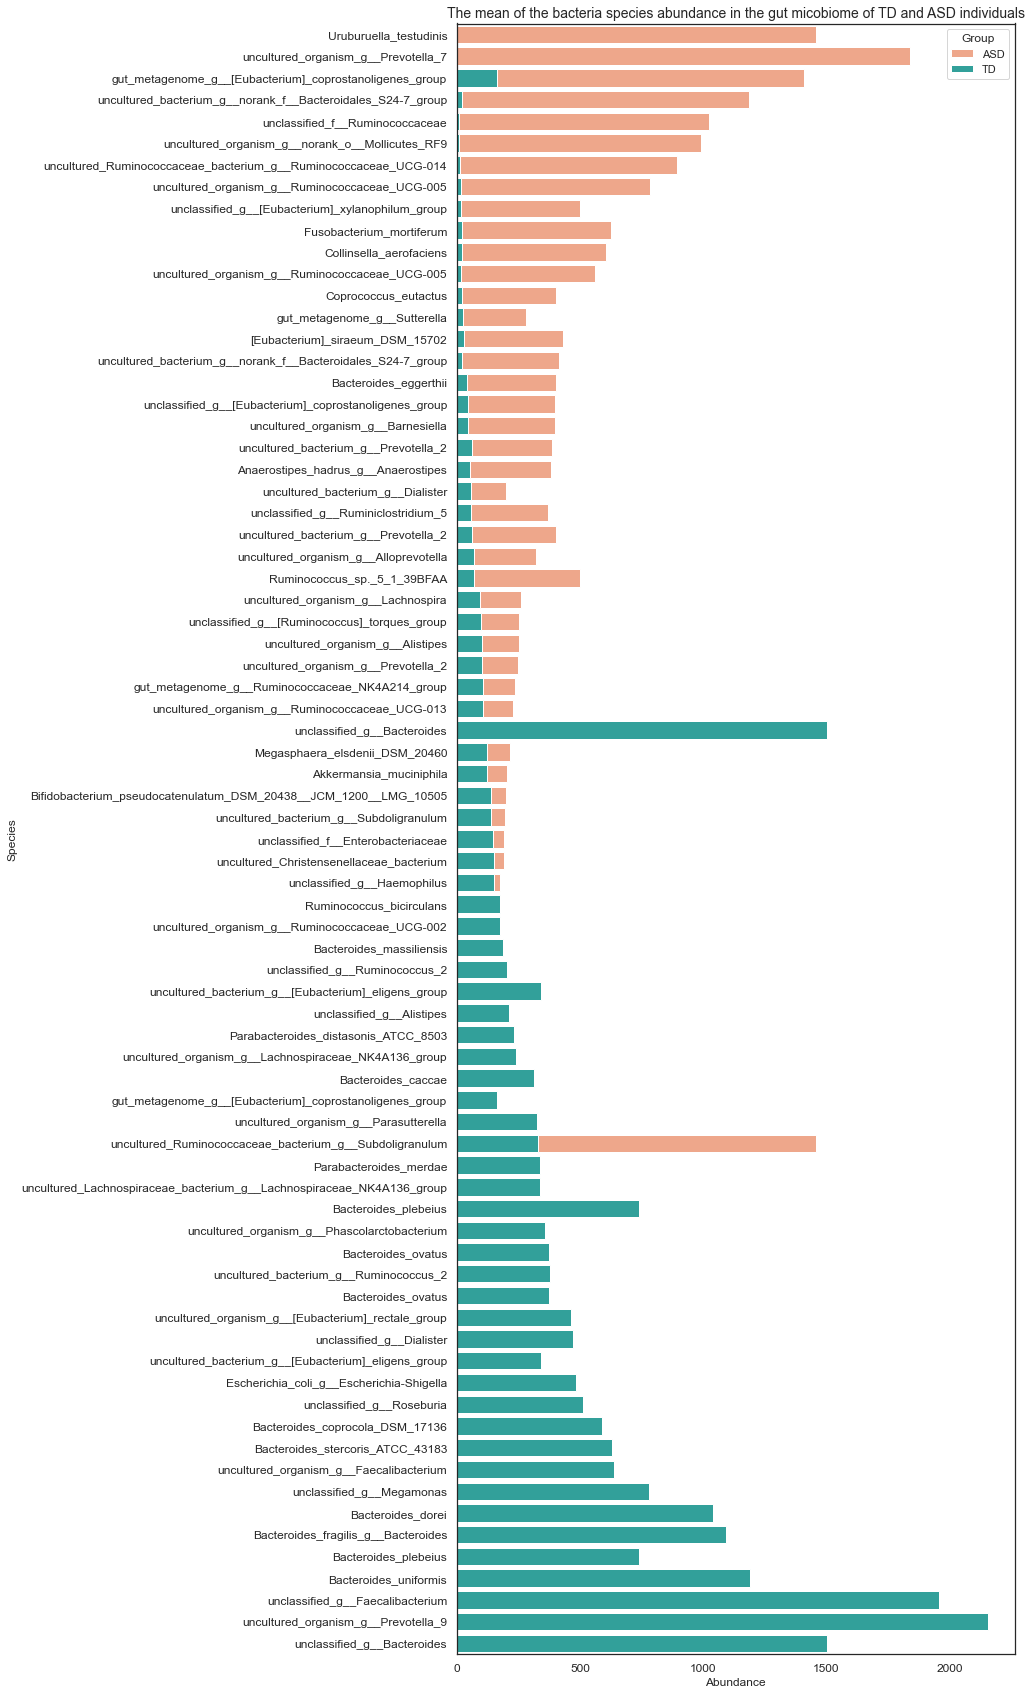

In [48]:
fig, ax = plt.subplots(figsize = (10, 30))
b1 = sns.barplot(y='Species', x='ASDmean', data=df, ci=None, color='lightsalmon', order=df.sort_values('ASDmean', ascending=False).Species)
b2= sns.barplot(y='Species', x='TDmean', data=df, ci=None, color='lightseagreen', order=df.sort_values('TDmean', ascending=True).Species)

# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45, fontsize='large')
plt.title('The mean of the bacteria species abundance in the gut micobiome of TD and ASD individuals', fontsize=14)
plt.xlabel('Abundance', fontsize=12)
plt.ylabel('Species', fontsize=12)
top_bar = mpatches.Patch(color="lightsalmon", label='ASD')
bottom_bar = mpatches.Patch(color='lightseagreen', label='TD')
# plt.legend(handles=[top_bar, bottom_bar])
plt.legend(title="Group", labels=["ASD", "TD"], loc='upper right')
ax.yaxis.set_tick_params(labelsize='medium')
ax.xaxis.set_tick_params(labelsize='medium')
plt.show()

##### Figure 3. The mean of the bacteria species for TD and ASD groups.
The green bars indicate the mean of the richness of bacteria genus and specues in TD group while the red bars indicate the mean of the richness of bacteria genus and species in ASD group. 

The main species that have high mean abundance in the TD group were the unclassified Faecalibacterium, uncultured organism of Prevotella 9, and unclassified Bacteroides, Bacteroides uniformis, Bacteroides fragilis and Bacteroides dorei. The main species that have high mean abundance in the ASD group were the unculutred organism of Prevotella 7, Urubruella testudinis, the gut metagenome of Eubacterium in the coprostanoligenes group, and the uncultured Ruminococcacaea, and the uncultured bacterium of Bacteroidales S24-7 family. 

#### Data Analysis:

There were 48 unique genera that have the mean difference in both groups greater than 20 (Table 2). The maximum mean bacteria abundance at the genus level fro TD group was the genus Prevotella 9 at 1261 abundance (Table 1 and Table 2). The maximum mean abundance for ASD group was 293 abundance for genera: Bifidobacterium and Dialister (Table 1). Since the data were manipulated to keep the difference abundance between both groups greater than 20, the lowest abundance for TD group was 22 abundance for genus Ruminiclostridium 5 and for ASD group was also 22 abundance for genera Faecalibacterium and Sutterella (Table 1 and Table 2).

There were 67 different species present in the gut microbiome that have the difference species abundance between the two group greater than 20 (Table 4). The mean abundance of the each spcies was graphed in Figure 2. The maximum species abundance for ASD group was an unclassified Diaslister at the mean of 554 abudance (Table 3 and Table 4). The maximum species abundance for TD group was an uncultured organism that belongs to genus Prevotella 9 at the mean of 1261 abundance. Since that data were manipulated to keep the species that have the difference abundance between both groups that are greater than 20, the lowest mean abundance for both TD and ASD group was 22 abundance; an unclassified Ruminiclostridium 5 in the TD group and for ASD group were the uncultured Ruminococcaceae bacterium that belongs to genus Ruminococcaceae UCG-104 and the uncultured organism of Ruminococcacaea UCG-005 (Table 3 and Table 4).

#### Conclusion: 

At the genus level, genera Bifidobacterium, Dialister, and Escherichia-Shigell were more abundant in ASD group, while Prevotella 9, Megamonas, and Rumicoccus 2 were more abundant in TD group. 

The main genus and species of the gut microbiome that were more present in ASD group and were present in a lesser number in TD group were Bifidobacterium pseudocatenulatum DSM 20438 or JCM1200 or LMG 10505, unclassified Dialister, Bacteroides uniformis, uncultured organisms of Faecalibacterium, and uncultured Lachnospiraceae NK4A136.

The main genus and species of the gut miciobiome that were more abundance present in TD group and were present at a lesser number of abundance in ASD group were the uncultured organisms of Prevotella 9, Bacteroides stercoris ATCC 43183, Bacteroides plebeius, and unclassified Magamonas. 

The genera and species that were more abundant in ASD group and have a lesser number of bacteria abundance in the TD group were more likely be the drvien species responsible for ASD. Those are the Bifidobacterium pseudocatenulatum DSM 20438 or JCM1200 or LMG 10505, unclassified Dialister, Bacteroides uniformis, uncultured organisms of Faecalibacterium, and uncultured Lachnospiraceae NK4A136.


#### A short summary of my Methods

In this milestone, I performed a Data Analysis on the "GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.csv". My first step was going through all the steps of a Data Analysis pipeline (load, clean and process). First, I took the mean of all the rows and remove values that are less than 1 to clean the dataset and for better visualizations. Then I performed the mean bacteria abundance calculations of each group (there are two groups in the data set: TD and ASD) as well as the differences in bacteria abundance of each group. I, then, further cleaned the data by removing the differences in bacteria abundance of both groups by dropping all values that are lower than 20 abundance. For a better understanding of the taxonomy of the bacteria, the taxonomy column in the dataset was split into 8 columns that corresponds to each level of the taxonomy. From that, the graphs of the bacteria abundance correspond to each level of the taxonomy were created to explore the shift of the gut microbiota of a typically developing (non-ASD) group and an ASD group at a specific level.
